In [37]:
#Import What is Needed
import pandas as pd 
#Pandas allows us to work with the data that we get from pybaseball (a pandas dataframe is what the data is imported as)
import pybaseball as pb
#Pybasbeall allows us to import the data
import numpy as np
#Numpy allows us to work with the data we are given more easily for what we want to accomplish for this specific task
pb.cache.enable() #Allows for information that is looked up get stored in in local memory
def pitcher_lookup(): #Get the information of what the pitcher has done lifetime
    try:
        import pandas as pd
        import pybaseball as pb
        import numpy as np
        pb.cache.enable()
        p_name=input('Enter the pitchers name: ')
        p_name=p_name.title()
        f_p,l_p=p_name.split()
        p_keys=pb.playerid_lookup(l_p , f_p)
        global p_key
        p_key=np.array(p_keys['key_mlbam'])
        p_key=int(p_key)
        global pitcher_statcast_df
        pitcher_statcast_df=pb.statcast_pitcher(start_dt="2015-01-01", end_dt='2023-11-28',player_id=p_key)
        pitcher_column_names=list(pitcher_statcast_df)
    except NameError:
        pass
    except TypeError:
        print('That Name does not exists in the statcast database')
def hitter_lookup(): #Get the information of what the hitter has done lifetime
    try:
        import pandas as pd
        import pybaseball as pb
        import numpy as np
        pb.cache.enable()
        h_name=input('Enter the hitters name: ')
        h_name=h_name.title()
        f_h,l_h=h_name.split()
        h_keys=pb.playerid_lookup(l_h , f_h)
        global h_key
        h_key=np.array(h_keys['key_mlbam'])
        h_key=int(h_key)
        hitter_statcast_df=pb.statcast_batter(start_dt="2015-01-01", end_dt='2023-11-28',player_id=h_key)
    except NameError:
        pass
    except TypeError:
        print('That Name does not exists in the statcast database')
def pitcher_v_hitter_outcome(): #Compare the stats using player ids and plot the outcomes in a bar graph
    try:
        pitcher_lookup()
        hitter_lookup()
        global p_v_h
        p_v_h=pitcher_statcast_df.query(f"batter == {h_key}")
        p_v_h.events.value_counts().plot(kind='bar',legend=True)
    except IndexError:
        print('They have not faced eachother in the statcast era')

Enter the pitchers name: Robert Suarez
Enter the hitters name: Bryce Harper


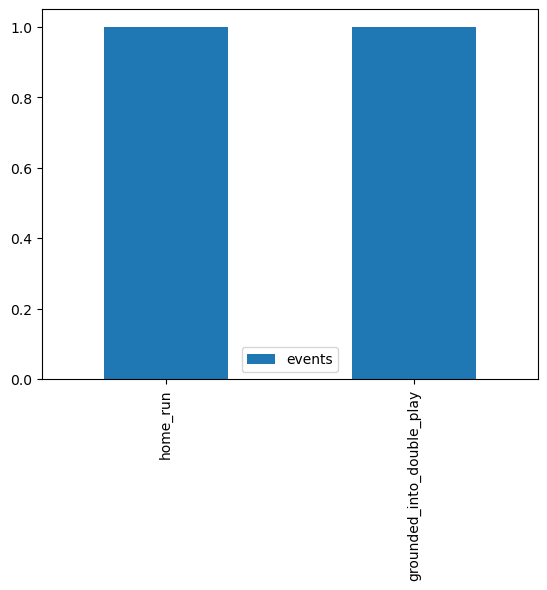

In [45]:
pitcher_v_hitter_outcome()

Enter the pitchers name: Hunter Greene
Enter the hitters name: Austin Riley


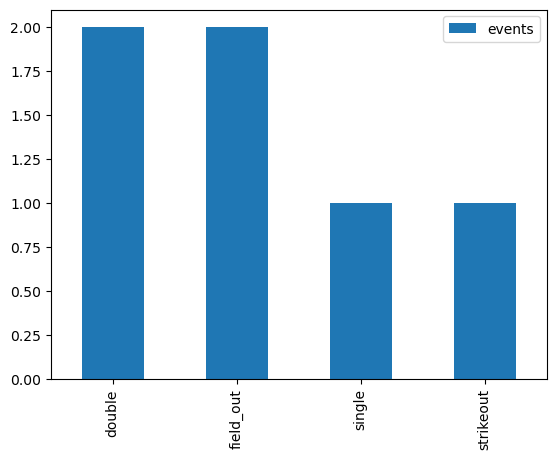

In [46]:
pitcher_v_hitter_outcome()

Enter the pitchers name: Hunter greene
Enter the hitters name: bryce harper
They have not faced eachother in the statcast era


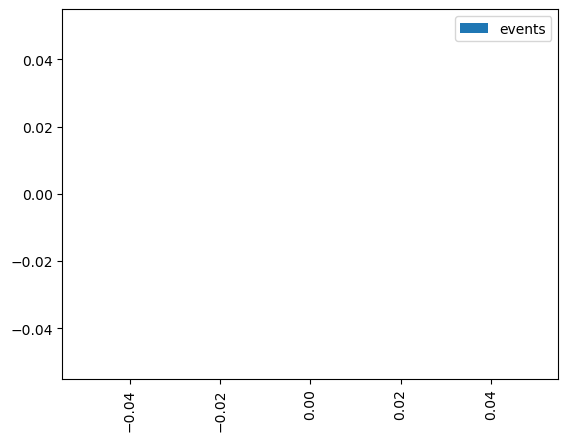

In [47]:
pitcher_v_hitter_outcome()